In [2]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import matplotlib as mpl
mpl.rc("font", family='Droid Sans Fallback', weight="bold")

名称: extreme_nervous_RC            
来源: 20221213-方正证券-多因子选股系列研究之八：显著效应、极端收益扭曲决策权重和“草木皆兵”因子       
作者: RC          
构造方法:          
1. 构建思路：个股择时信号 + 换手变化 = 特殊时刻的加速换手因子           
2. 构建辅助因子：         
i、惊恐度:  “偏离项”：计算个股收益率与中证全指收益率的差值，再取绝对值；“基准项”：计算个股收益率的绝对值，加市场收益率的绝对值，再加 0.1。“偏离项”除以“基准项”，得到该股票在该日的“惊恐度”。      
ii、波动率：全天每分钟收益率求标准差            
iii、个人投资者交易占比：将单笔成交金额小于 4 万元的交易，视为个人投资者交易。计算每天个股个人投资者卖出和买入的金额均值，再除以个股的当日总体成交金额，得到当日个股的个人投资者交易比。        
iv、衰减后的“惊恐度”：将 t 日的惊恐度，减去 t-1 日和 t-2 日的“惊恐度”的均值，得到一个差值，将该差值为负的交易日的数据都替换为空值，记为衰减后的“惊恐度”。          
3. 因子计算：         
i、“原始惊恐”因子：每日的“惊恐度”与每日的收益率相乘作为加权决策分，计算过去 20 个交易日的“加权决策分”的均值和标准差，分别记为“惊恐收益”因子和“惊恐波动”因子，二者等权合成为“原始惊恐”因子。         
ii、“波动率加剧-惊恐”因子：每日的“惊恐度”、波动率与收益率相乘作为加权决策分，计算过去 20 个交易日的“加权决策分”的均值和标准差，记为“波动率加剧-惊恐收益”因子和“波动率加剧-惊恐波动”因子，二者等权合成为“波动率加剧-惊恐”因子。              
iii、“个人投资者交易比-惊恐”因子:每天的个人投资者交易比、“惊恐度”和收益率相乘作为加权决策分，计算过去 20 个交易日的“加权决策分”的均值和标准差，记为“个人投资者交易比-惊恐收益”因子和“个人投资者交易比-惊恐波动”因子，二者等权合成为“个人投资者交易比-惊恐”因子。          
iv、“注意力衰减-惊恐”因子。每天的衰减后的“惊恐度”和收益率相乘作为加权决策分，计算过去 20 个交易日的“加权决策分”的均值和标准差，记为“注意力衰减-惊恐收益”因子和“注意力衰减-惊恐波动”因子，二者等权合成为“注意力衰减-惊恐”因子。           
v、“草木皆兵”因子：将每天的衰减后的“惊恐度”、波动率、个人投资者者交易比、收益率相乘，作为当日的加权决策分，分别计算过去 20 日的加权决策分的均值和标准差，记为“草木皆兵-收益”因子和“草木皆兵-波动”因子，并将二者等权合成为“草木皆兵”因子。        

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


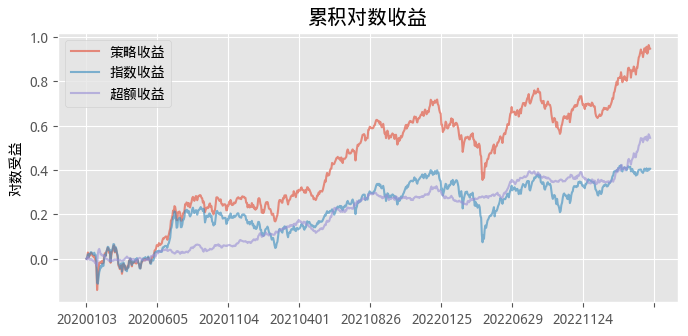

,指数收益,超额收益,策略收益
年化收益率,0.127,0.171,0.298
年化波动率,0.211,0.095,0.235
夏普率,0.605,1.804,1.265
最大回撤,-0.325,-0.083,-0.363
收益回撤比,0.392,2.071,0.821
胜率,0.540,0.512,0.567
盈亏比,0.945,1.316,0.942


In [4]:
factor = ff.read('extreme_nervous_week_RC')
p = ff.run((factor*ff.filter0).loc[:,:'20230416'], positions=100, period=1, fees=0)